# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

**So let's go!**

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

Let's load the data now.

In [1]:
import pandas as pd 
import numpy as np 
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')
movies
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column


In [2]:
credits.columns = ['id','tittle','cast','crew']
movies= movies.merge(credits,on='id')

Just a peak at our data.

In [3]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [4]:
C= movies['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [5]:
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart 

In [6]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [9]:
q_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",6.693677
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",...,

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [10]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score','id']].head(12)


,title,vote_count,vote_average,score,id
1881,The Shawshank Redemption,8205,8.5,8.059258,278
662,Fight Club,9413,8.3,7.939256,550
65,The Dark Knight,12002,8.2,7.920020,155
3232,Pulp Fiction,8428,8.3,7.904645,680
96,Inception,13752,8.1,7.863239,27205
3337,The Godfather,5893,8.4,7.851236,238
95,Interstellar,10867,8.1,7.809479,157336
809,Forrest Gump,7927,8.2,7.803188,13
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243,122
1990,The Empire Strikes Back,5879,8.2,7.697884,1891


In [39]:
#import pickle
#pickle.dump(q_movies,open("trending_Movies.pkl",'wb'))

In [12]:
pop

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],...,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0,Midnight Cabaret,"[{""cast_id"": 1, ""character"": ""Dawn"", ""credit_i...","[{""credit_id"": ""582a4cdb9251417b1803dd47"", ""de..."
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],...,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0,Hum To Mohabbat Karega,[],[]
4727,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,65448,"[{""id"": 378, ""name"": ""prison""}, {""id"": 209476,...",en,Penitentiary,A hitchhiker named Martel Gordone gets in a fi...,0.001117,[],...,99.0,"[{""iso_639_1"": ""en"", ""name"": "

In [41]:
#import pickle
#pickle.dump(pop,open("Popular_Movies.pkl",'wb'))

Hurray! We have made our first(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

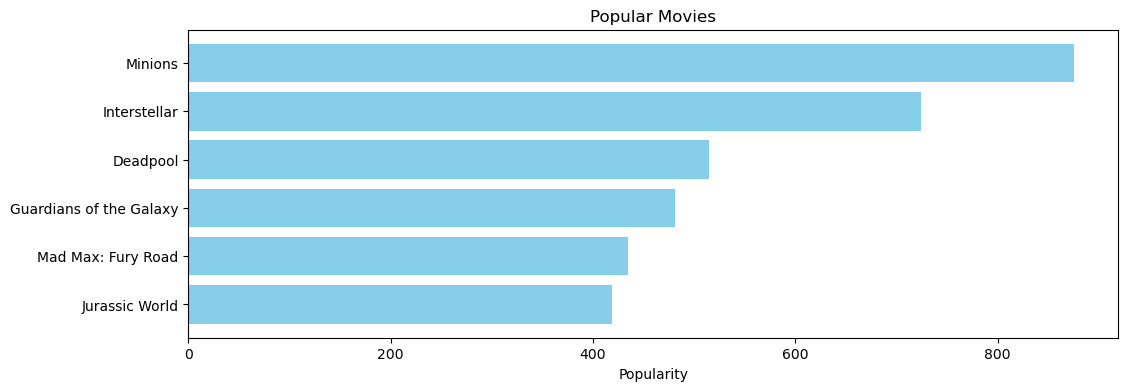

In [11]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

In [13]:
movies['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [14]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
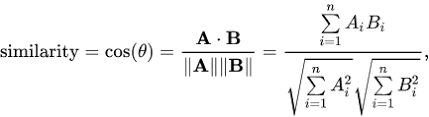

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [15]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [16]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [17]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:13]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies[['title','id',"vote_average",'homepage','vote_count','genres']].iloc[movie_indices]

In [18]:
#import pickle
#pickle.dump(cosine_sim,open("cosine_sim.pkl",'wb'))
#pickle.dump(movies,open("movies.pkl",'wb'))
#pickle.dump(indices,open("indices.pkl",'wb'))

In [19]:
movies.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [20]:
get_recommendations('Man of Steel')

,title,id,vote_average,homepage,vote_count,genres
223,The Chronicles of Riddick,2789,6.3,NaN,1570,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na..."
1275,Sunshine,1272,7.0,NaN,1182,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
220,Prometheus,70981,6.3,http://www.projectprometheus.com/,5080,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
1934,Say It Isn't So,20309,4.8,NaN,47,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
539,Titan A.E.,7450,6.3,NaN,313,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 28, ""..."
2375,Midnight Special,245703,6.2,http://www.midnightspecialmovie.com/,694,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""..."
1761,The NeverEnding Story,34584,7.0,NaN,1002,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n..."
585,War Horse,57212,7.0,http://www.warhorsemovie.com/,992,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10752, ""n..."
2644,Ong Bak 2,16353,6.0,http://www.ongbak2themovie.com/,152,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
674,Astro Boy,16577,6.1,http://www.astroboy-themovie.com/,409,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 28, ""..."


In [21]:
get_recommendations('The Avengers')

,title,id,vote_average,homepage,vote_count,genres
7,Avengers: Age of Ultron,99861,7.3,http://marvel.com/movies/movie/193/avengers_ag...,6767,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3144,Plastic,208869,6.1,NaN,86,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name..."
1715,Timecop,8831,5.5,NaN,282,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""..."
4124,This Thing of Ours,67373,5.0,NaN,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name..."
3311,Thank You for Smoking,9388,7.1,NaN,664,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
3033,The Corruptor,9455,6.0,NaN,57,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
588,Wall Street: Money Never Sleeps,33909,5.8,http://www.wallstreetmoneyneversleeps.com/,493,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name..."
2136,Team America: World Police,3989,6.6,http://www.teamamerica.com,660,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 12, ""n..."
1468,The Fountain,1381,6.8,http://thefountainmovie.warnerbros.com/,827,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 12, ""name..."
1286,Snowpiercer,110415,6.7,http://snowpiercer-film.com/,2854,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na..."


While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [22]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [23]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [24]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 5:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [25]:
movies[features[0]]

0       [{'cast_id': 242, 'character': 'Jake Sully', '...
1       [{'cast_id': 4, 'character': 'Captain Jack Spa...
2       [{'cast_id': 1, 'character': 'James Bond', 'cr...
3       [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4       [{'cast_id': 5, 'character': 'John Carter', 'c...
                              ...                        
4798    [{'cast_id': 1, 'character': 'El Mariachi', 'c...
4799    [{'cast_id': 1, 'character': 'Buzzy', 'credit_...
4800    [{'cast_id': 8, 'character': 'Oliver O’Toole',...
4801    [{'cast_id': 3, 'character': 'Sam', 'credit_id...
4802    [{'cast_id': 3, 'character': 'Herself', 'credi...
Name: cast, Length: 4803, dtype: object

In [26]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [27]:
# Print the new features of the first 3 films
movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [28]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [29]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy sciencefiction'

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [33]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies['tags'] = movies.apply(create_soup, axis=1)

In [ ]:
movies['tags'][0]

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [36]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['tags'])

In [37]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.28603878, 0.19069252, ..., 0.        , 0.        ,
        0.        ],
       [0.28603878, 1.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.19069252, 0.2       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [38]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])


We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [39]:
#import pickle
#pickle.dump(cosine_sim2,open("tags.pkl",'wb'))

In [40]:
get_recommendations('Man of Steel', cosine_sim2)

,title,id,vote_average,homepage,vote_count,genres
9,Batman v Superman: Dawn of Justice,209112,5.7,http://www.batmanvsupermandawnofjustice.com/,7004,"[action, adventure, fantasy]"
10,Superman Returns,1452,5.4,http://www.superman.com,1400,"[adventure, fantasy, action, sciencefiction]"
813,Superman,1924,6.9,NaN,1022,"[action, adventure, fantasy, sciencefiction]"
870,Superman II,8536,6.5,NaN,629,"[action, adventure, fantasy, sciencefiction]"
1296,Superman III,9531,5.3,NaN,490,"[comedy, action, adventure, fantasy, sciencefi..."
41,Green Lantern,44912,5.1,http://greenlanternmovie.warnerbros.com/,2487,"[adventure, action, thriller, sciencefiction]"
2433,Superman IV: The Quest for Peace,11411,4.1,NaN,318,"[action, adventure, sciencefiction]"
72,Suicide Squad,297761,5.9,http://www.suicidesquad.com/,7458,"[action, adventure, crime, fantasy, sciencefic..."
1652,Dragonball Evolution,14164,2.9,NaN,462,"[action, adventure, fantasy, sciencefiction, t..."
7,Avengers: Age of Ultron,99861,7.3,http://marvel.com/movies/movie/193/avengers_ag...,6767,"[action, adventure, sciencefiction]"


In [41]:
get_recommendations('The Godfather', cosine_sim2)

,title,id,vote_average,homepage,vote_count,genres
867,The Godfather: Part III,242,7.1,http://www.imdb.com/title/tt0099674/,1546,"[crime, drama, thriller]"
2731,The Godfather: Part II,240,8.3,NaN,3338,"[drama, crime]"
4638,Amidst the Devil's Wings,378237,0.0,NaN,0,"[drama, action, crime]"
2649,The Son of No One,74536,4.8,NaN,92,"[drama, thriller, crime]"
1525,Apocalypse Now,28,8.0,http://www.apocalypsenow.com,2055,"[drama, war]"
1170,The Talented Mr. Ripley,1213,7.0,http://www.miramax.com/movie/the-talented-mr-r...,767,"[thriller, crime, drama]"
1209,The Rainmaker,11975,6.7,NaN,235,"[drama, crime, thriller]"
1394,Donnie Brasco,9366,7.4,NaN,1147,"[crime, drama, thriller]"
2280,Sea of Love,12150,6.7,NaN,141,"[drama, crime, mystery]"
2792,Glengarry Glen Ross,9504,7.5,NaN,323,"[crime, drama, mystery]"


We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add *production_company* . 
We can also increase the weight of the director , by adding the feature multiple times in the soup.

# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from ast import literal_eval

# in case you have placed the files outside of your working directory, you need to specify a path
#path = '' # for example: 'data/movie_recommendations/'  

# load the movie metadata
df_moviesmetadata=pd.read_csv('movies_metadata.csv', low_memory=False) 
print(df_moviesmetadata.shape)
print(df_moviesmetadata.columns)
df_moviesmetadata.head(1)

(45466, 24)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


(100004, 4)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


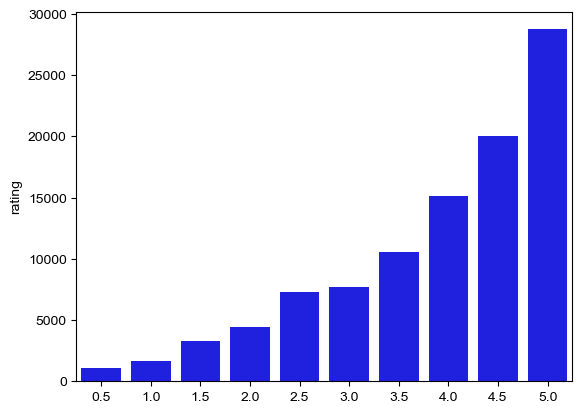

In [2]:
# load the movie ratings
df_ratings=pd.read_csv('ratings_small.csv', low_memory=False) 

print(df_ratings.shape)
print(df_ratings.columns)
df_ratings.head(3)

rankings_count = df_ratings.rating.value_counts().sort_values()
sns.barplot(x=rankings_count.index.sort_values(), y=rankings_count, color="b")
sns.set_theme(style="whitegrid")

In [4]:
df_mmeta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
# 2.1 Movies Data

# remove invalid records with invalid ids
df_mmeta = df_moviesmetadata.drop([19730, 29503, 35587])

df_movies = pd.DataFrame()

# we only consider movies with at least 10 ratings
df_movies = df_mmeta[(df_mmeta['vote_count'] >= 10) & (df_mmeta['vote_average'].notnull())][['title','vote_count','vote_average','popularity','homepage','imdb_id']]

# extract the release year 
df_movies['year'] = pd.to_datetime(df_mmeta['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

# extract genres
df_movies['genres'] = df_mmeta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# change the index to movie_id
df_movies['movieId'] = pd.to_numeric(df_mmeta['id'])
df_movies = df_movies.set_index('movieId')

# add vote count
df_movies['vote_count'] = df_movies['vote_count'].astype('int')
df_movies


,title,vote_count,vote_average,popularity,homepage,imdb_id,year,genres
movieId,,,,,,,,
862,Toy Story,5415,7.7,21.946943,http://toystory.disney.com/toy-story,tt0114709,1995,"[Animation, Comedy, Family]"
8844,Jumanji,2413,6.9,17.015539,NaN,tt0113497,1995,"[Adventure, Fantasy, Family]"
15602,Grumpier Old Men,92,6.5,11.7129,NaN,tt0113228,1995,"[Romance, Comedy]"
31357,Waiting to Exhale,34,6.1,3.859495,NaN,tt0114885,1995,"[Comedy, Drama, Romance]"
11862,Father of the Bride Part II,173,5.7,8.387519,NaN,tt0113041,1995,[Comedy]
...,...,...,...,...,...,...,...,...
49279,The Man with the Rubber Head,29,7.6,1.618458,NaN,tt0000359,1901,"[Comedy, Fantasy, Science Fiction]"
49271,The Devilish Tenant,12,6.7,0.725084,NaN,tt0127948,1909,"[Fantasy, Comedy]"
49280,The One-Man Band,22,6.5,1.109068,NaN,tt0135453,1900,"[Fantasy, Action, Thriller]"


In [7]:
# 2.2 Ratings Data

# Drop na values
df_ratings_temp = df_ratings.dropna()

# Convert datetime
df_ratings_temp['timestamp'] =  pd. to_datetime(df_ratings_temp['timestamp'], unit='s')

print(f'unique users: {len(df_ratings_temp.userId.unique())}, ratings: {len(df_ratings_temp)}')
df_ratings_temp.head()

unique users: 671, ratings: 100004


,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [8]:
final=df_movies.merge(df_ratings_temp,on='movieId')

In [9]:
final

,movieId,title,vote_count,vote_average,popularity,homepage,imdb_id,year,genres,userId,rating,timestamp
0,949,Heat,1886,7.7,17.924927,NaN,tt0113277,1995,"[Action, Crime, Drama, Thriller]",23,3.5,2006-05-27 09:11:32
1,949,Heat,1886,7.7,17.924927,NaN,tt0113277,1995,"[Action, Crime, Drama, Thriller]",102,4.0,2000-04-24 17:55:42
2,949,Heat,1886,7.7,17.924927,NaN,tt0113277,1995,"[Action, Crime, Drama, Thriller]",232,2.0,2000-04-07 07:31:37
3,949,Heat,1886,7.7,17.924927,NaN,tt0113277,1995,"[Action, Crime, Drama, Thriller]",242,5.0,2000-04-25 18:53:45
4,949,Heat,1886,7.7,17.924927,NaN,tt0113277,1995,"[Action, Crime, Drama, Thriller]",263,3.0,2005-06-04 00:56:15
...,...,...,...,...,...,...,...,...,...,...,...,...
40008,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",547,5.0,2001-02-04 18:55:02
40009,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",585,4.0,2000-11-27 22:09:27
40010,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",624,4.0,2002-04-18 10:04:39
40011,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",652,4.0,2015-08-22 18:52:08


In [11]:
#Now User Based Filtering 
x= final.groupby('userId').count()['rating']>50
mostWatchedMoviesUser=x[x].index


In [12]:
filtered_rating = final[final['userId'].isin(mostWatchedMoviesUser)]


In [13]:
#Now Book Based Filtering
y=filtered_rating.groupby('title').count()['rating']>20
famous_movies=y[y].index


In [14]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_movies)]
final_ratings

,movieId,title,vote_count,vote_average,popularity,homepage,imdb_id,year,genres,userId,rating,timestamp
20,1408,Cutthroat Island,137,5.7,7.284477,NaN,tt0112760,1995,"[Action, Adventure]",19,3.0,1997-02-06 01:35:10
21,1408,Cutthroat Island,137,5.7,7.284477,NaN,tt0112760,1995,"[Action, Adventure]",23,3.5,2006-05-27 09:06:00
22,1408,Cutthroat Island,137,5.7,7.284477,NaN,tt0112760,1995,"[Action, Adventure]",57,4.0,1998-10-07 12:28:03
24,1408,Cutthroat Island,137,5.7,7.284477,NaN,tt0112760,1995,"[Action, Adventure]",73,3.0,2014-04-27 03:05:44
25,1408,Cutthroat Island,137,5.7,7.284477,NaN,tt0112760,1995,"[Action, Adventure]",111,4.5,2004-10-10 17:58:01
...,...,...,...,...,...,...,...,...,...,...,...,...
40007,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",518,5.0,1999-12-16 17:01:08
40008,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",547,5.0,2001-02-04 18:55:02
40009,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",585,4.0,2000-11-27 22:09:27
40010,3104,Frankenstein Created Woman,33,5.9,2.302582,NaN,tt0061683,1967,"[Horror, Science Fiction]",624,4.0,2002-04-18 10:04:39


In [15]:
pt = final_ratings.pivot_table(index='title',columns='userId',values='rating')

In [16]:
pt.fillna(0,inplace=True)

In [17]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=1000000)

In [18]:
for i in range(426):
    print(pt.index[i])

20,000 Leagues Under the Sea
2001: A Space Odyssey
28 Days Later
28 Weeks Later
300
48 Hrs.
5 Card Stud
8 Women
88 Minutes
A Bridge Too Far
A Brief History of Time
A Clockwork Orange
A Nightmare on Elm Street
A Perfect Murder
A River Runs Through It
A Time to Kill
Addicted to Love
Adventures of Zatôichi
Aelita: Queen of Mars
Aguirre: The Wrath of God
Ali: Fear Eats the Soul
Alien
Aliens vs Predator: Requiem
All the King's Men
All the Way Boys
Almost Famous
American Graffiti
American Pie
American Pie 2
An Unfinished Life
Anatomy of Hell
And Then There Were None
Antoine and Colette
Ariel
Arlington Road
Armageddon
Ask the Dust
Asterix at the Olympic Games
Avalon
Back to the Future
Back to the Future Part II
Back to the Future Part III
Bad Boys II
Bang, Boom, Bang
Bangkok Dangerous
Barry Lyndon
Batman Begins
Batman Returns
Battle Royale
Bean
Beauty and the Beast
Because I Said So
Beetlejuice
Being John Malkovich
Bell, Book and Candle
Belle Époque
Ben X
Bend It Like Beckham
Berlin: Symphony

IndexError: index 425 is out of bounds for axis 0 with size 425

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
similarity_scores = cosine_similarity(pt)

In [25]:
similarity_scores.shape

(425, 425)

In [52]:
def recommendMoviesUsingCollabrative(movie_name):
    # index fetch
    if(np.where(pt.index==movie_name)[0][0]):
        index = np.where(pt.index==movie_name)[0][0]
    else:
        return -1
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df_movies[df_movies['title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['vote_count'].values))
        item.extend(list(temp_df.drop_duplicates('title')['vote_average'].values))
        item.extend(list(temp_df.drop_duplicates('title')['genres'].values))
        item.extend(list(temp_df.drop_duplicates('title')['homepage'].values))
        item.extend(list(temp_df.drop_duplicates('title')['imdb_id'].values))
        
        data.append(item)
    
    return data

In [43]:
def fetch_imdb_poster(movieid):
    url = "https://imdb8.p.rapidapi.com/title/get-images"
    querystring = {"tconst": movieid, "limit": "25"}
    headers = {
        "X-RapidAPI-Key": "46f65b13a1msh93aa905d2fc2d1ep107de1jsncaa5a390e9c6",
        "X-RapidAPI-Host": "imdb8.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
            data = response.json()
            if 'images' in data:
                first_poster_url = data['images']
                for i in first_poster_url:
                    print(i['url'])
            else:
                print( "Posters not found in the response")
    else:
        print( f"Error: {response.status_code} - {response.text}")



In [44]:
import requests
result=recommendMoviesUsingCollabrative('2001: A Space Odyssey')
TagsBasedPoster=[]
for i in result:
    TagsBasedPoster.append(fetch_imdb_poster(i[5]))

https://m.media-amazon.com/images/M/MV5BNGFkOTQxNzMtNjU4ZC00NDJkLTlhYWYtM2U5YmQwMWYyNTVkXkEyXkFqcGdeQXVyMTI4MTk2NzMz._V1_.jpg
https://m.media-amazon.com/images/M/MV5BNjNmYTJlYjQtOTA2MC00NmUwLTg0YTctZDdhMzEyYmU5OWQ5XkEyXkFqcGdeQXVyNjA4NTIyOTE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BYWYzZjkzYmUtZmFjOS00NGExLTk2ZjYtYzM3Yzk5Y2FjMjhmXkEyXkFqcGdeQXVyOTc5MDI5NjE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BYmYwMzk0NmQtY2UzZi00YWEzLThlNTItZGJlNjBmNzcyNzllXkEyXkFqcGdeQXVyOTc5MDI5NjE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BMjYxOTI3MDctMjkwOS00NWI4LWI1YTMtZDlkNWU0MmU2NWM1XkEyXkFqcGdeQXVyOTc5MDI5NjE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BODQzNjQ3YzQtYTNjMC00OWI3LTllZjItNmUxMzA3NzhiNDk2XkEyXkFqcGdeQXVyOTc5MDI5NjE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BYTczNjFiMzgtMzM4NC00ZTlhLWE3MWItYWI0ZjRiYTY0MjVhXkEyXkFqcGdeQXVyOTc5MDI5NjE@._V1_.jpg
https://m.media-amazon.com/images/M/MV5BNmU0MGU1ODQtNjNmNC00ODI2LTlmZGQtNWM3NzMwYjliYzk3XkEyXkFqcGdeQXVyOTc5MDI5NjE@._

In [45]:
TagsBasedPoster

[None, None, None, None, None]

In [47]:
for i in result[1:]:
    print(i)

['Arlington Road', 246, 7.0, ['Drama', 'Thriller', 'Mystery'], nan, 'tt0137363']
['Psycho', 2405, 8.3, ['Drama', 'Horror', 'Thriller'], nan, 'tt0054215']
['Big Fish', 2064, 7.6, ['Adventure', 'Fantasy', 'Drama'], nan, 'tt0319061']
['The Hours', 461, 7.0, ['Drama'], nan, 'tt0274558']


In [54]:
recommendMoviesUsingCollabrative('ss')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [49]:
for i in result1[1:]:
    print(i)

['Ghost Dog: The Way of the Samurai', 306, 7.2, ['Crime', 'Drama'], nan, 'tt0165798']
["My Best Friend's Wedding", 606, 6.4, ['Comedy', 'Romance'], nan, 'tt0119738']
['The Out-of-Towners', 46, 5.1, ['Comedy'], nan, 'tt0129280']
['Star 80', 19, 6.1, ['Drama'], nan, 'tt0086355']


In [132]:
#import pickle
#pickle.dump(df_movies,open('Collabrative_df_movies.pkl','wb'))
#pickle.dump(pt,open('Collabrative_pt','wb'))
#pickle.dump(similarity_scores,open('Collabrative_similarity_scores.pkl','wb'))

In [33]:
import pickle
pickle.dump(df_movies,open('Collabrative_df_movies.pkl','wb'))

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

Let us pick user with user Id 1  and check the ratings she/he has given.

For movie with ID 302, we get an estimated prediction of **2.618**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

If you enjoyed reading the kernel , hit the upvote button !
Please leave the feedback or suggestions below. 